<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#load-data" data-toc-modified-id="load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load data</a></span></li><li><span><a href="#get-clean-text" data-toc-modified-id="get-clean-text-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>get clean text</a></span><ul class="toc-item"><li><span><a href="#find-same-texts" data-toc-modified-id="find-same-texts-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>find same texts</a></span></li></ul></li><li><span><a href="#learn-fasttext-representations" data-toc-modified-id="learn-fasttext-representations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>learn fasttext representations</a></span></li><li><span><a href="#to-vectors" data-toc-modified-id="to-vectors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>to vectors</a></span></li></ul></div>

In [1]:
import re
from collections import Counter
import numpy as np
import pandas as pd
from gensim.models.fasttext import FastText
from keras.preprocessing.text import text_to_word_sequence

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


# load data

In [28]:
df = pd.read_csv('../data/train/chats_train.csv')

# get clean text

In [29]:
df['text'].fillna('', inplace=True)

In [30]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [31]:
RE_WORD = re.compile(r'\w+')
def only_alpha(text):
    return ' '.join(RE_WORD.findall(text))

In [32]:
df['clean_text'] = df['text'].apply(only_alpha)

In [33]:
df = df[df['clean_text'] != ''].copy()

In [34]:
df = df[~df['text'].str.contains('http://')].copy()

In [35]:
df = df[~df['text'].str.contains('https://')].copy()

In [36]:
df['words_count'] = df['clean_text'].apply(lambda x: len(x.split()))

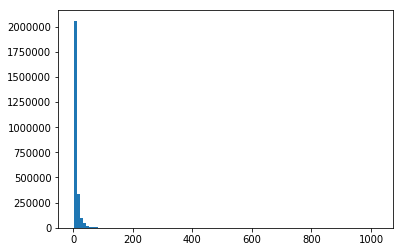

In [37]:
plt.hist(df['words_count'], bins=100)
plt.show()

In [38]:
df[df['words_count'] > 200].head()['clean_text']

672     pump_signal_bitcoin put in front of it and joi...
673     pump_signal_bitcoin put in front of it and joi...
3019    want to know about bitcoin the story of bitcoi...
6879    chile s national energy commission launches et...
7749    in light of recent rumors spread amongst our i...
Name: clean_text, dtype: object

In [39]:
df = df[df['words_count'] < 200].copy()

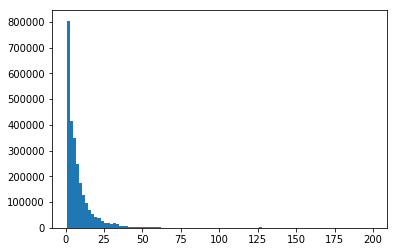

In [40]:
plt.hist(df['words_count'], bins=100)
plt.show()

In [41]:
df.loc[2887367]['text']

'to all newcomers, welcome to ontology! please read the pinned message before posting.\n\nproject information will only be distributed through official channels. admins will never contact you to ask for your private key, to make a contribution to a wallet to receive ont tokens, and so on. please be extra cautious and keep an eye out for scams.'

In [42]:
df.loc[2887381]['text']

'to all newcomers, welcome to ontology! please read the pinned message before posting.\n\nproject information will only be distributed through official channels. admins will never contact you to ask for your private key, to make a contribution to a wallet to receive ont tokens, and so on. please be extra cautious and keep an eye out for scams.'

In [43]:
df.loc[2887381]

chat_id                                                     1232812654
chat_title                                          Ontology (English)
emoji_list                                                          []
sender_first_name                                         Group Butler
sender_id                                                    461882516
sender_is_bot                                                     True
sender_last_name                                                  None
sender_username                                           gbdummy1_bot
text                 to all newcomers, welcome to ontology! please ...
timestamp                                                   1520825255
clean_text           to all newcomers welcome to ontology please re...
words_count                                                         58
Name: 2887381, dtype: object

In [44]:
df['sender_is_bot'].value_counts()

False    2539648
True       47660
Name: sender_is_bot, dtype: int64

In [45]:
df = df[~df['sender_is_bot']].copy()

## find same texts

In [46]:
text_counter = Counter(df['clean_text'])
text_counter.most_common(10)

[('none', 304273),
 ('lol', 20171),
 ('yes', 10725),
 ('hi', 7806),
 ('thanks', 5789),
 ('hello', 5781),
 ('no', 5170),
 ('ok', 4096),
 ('why', 3588),
 ('support binance_faq_bot', 3250)]

In [47]:
text_counter = Counter(df[df['words_count'] > 1]['clean_text'])
text_counter.most_common(10)

[('support binance_faq_bot', 3250),
 ('thank you', 2511),
 ('app binance_faq_bot', 1199),
 ('burn binance_faq_bot', 1066),
 ('me too', 1051),
 ('ok thanks', 1024),
 ('2fa binance_faq_bot', 941),
 ('list binance_faq_bot', 920),
 ('help groupbutler_bot', 837),
 ('when moon', 793)]

In [48]:
text_counter = Counter(df[df['words_count'] > 2]['clean_text'])
text_counter.most_common(10)

[('buy buy buy', 517),
 ('what do you mean', 437),
 ('you re welcome', 417),
 ('you are welcome', 402),
 ('warn no ads', 348),
 ('to the moon', 334),
 ('i hope so', 312),
 ('here we go', 266),
 ('any admin here', 257),
 ('important reminder the binance telegram group is a platform for discussion and there is no official customer support provided in the group if you need to contact binance customer support please open a ticket and we will respond as soon as possible remember that we will never ask you to send money to any address for any reason if someone asks you to do this they are trying to scam you and they should be ignored report these users to an administrator privately also bear in mind that this chat is meant for binance and related crypto topics advertising coins or projects unaffiliated with binance may result in a kick ban and the same will hold true for offensive imagery language thank you and happy chatting',
  243)]

In [49]:
text_counter = Counter(df[df['words_count'] > 3]['clean_text'])
text_counter.most_common(5)

[('what do you mean', 437),
 ('important reminder the binance telegram group is a platform for discussion and there is no official customer support provided in the group if you need to contact binance customer support please open a ticket and we will respond as soon as possible remember that we will never ask you to send money to any address for any reason if someone asks you to do this they are trying to scam you and they should be ignored report these users to an administrator privately also bear in mind that this chat is meant for binance and related crypto topics advertising coins or projects unaffiliated with binance may result in a kick ban and the same will hold true for offensive imagery language thank you and happy chatting',
  243),
 ('i don t think so', 196),
 ('how do you know', 192),
 ('while we appreciate discussions pls take note that any price discussions here cannot be taken as financial advice',
  183)]

In [50]:
df = df[df['words_count'] > 4].copy()

In [52]:
df.shape

(1324111, 12)

In [53]:
text_counter = Counter(df['clean_text'])

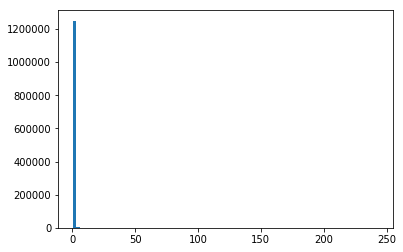

In [58]:
plt.hist(text_counter.values(), bins=100)
plt.show()

In [59]:
df['repeats'] = df['clean_text'].apply(lambda x: text_counter[x])

In [61]:
df = df[df['repeats'] == 1].copy()

In [92]:
RE_DIGIT = re.compile(r'\d')
def has_digit(text):
    return len(RE_DIGIT.findall(text)) > 0

In [93]:
df['has_digit'] = df['clean_text'].apply(has_digit)
df = df[~df['has_digit']].copy()

In [102]:
df.to_csv('../data/clean_text.csv', index=False)

# learn fasttext representations

In [94]:
class SentenceIterator(object):
    texts = None

    def __init__(self, texts):
        self.texts = texts

    def __iter__(self):
        for text in self.texts:
            yield text_to_word_sequence(text, lower=False)

In [95]:
fasttext_model = FastText(SentenceIterator(df['clean_text']), min_count=5)

In [96]:
fasttext_model.save('../data/fasttext_chats.bin')

In [104]:
fasttext_model.wv.most_similar('btc')

[('btcc', 0.9675153493881226),
 ('btcz', 0.9578822255134583),
 ('mbtc', 0.9530240297317505),
 ('gbtc', 0.9530173540115356),
 ('sbtc', 0.9456921815872192),
 ('btckrw', 0.9445890188217163),
 ('btcvix', 0.9370781183242798),
 ('ebtc', 0.935553252696991),
 ('btcs', 0.9274160861968994),
 ('aabtc', 0.9184903502464294)]

In [103]:
fasttext_model.wv.most_similar('eth')

[('ethcc', 0.9419276714324951),
 ('ethbtc', 0.916924238204956),
 ('ethusd', 0.9133284091949463),
 ('etheos', 0.8910346627235413),
 ('eoseth', 0.881376326084137),
 ('eths', 0.8803436756134033),
 ('etheruem', 0.8739531636238098),
 ('ethreum', 0.8610535264015198),
 ('etherium', 0.8602708578109741),
 ('etherum', 0.8553624153137207)]

In [100]:
df[df['clean_text'].str.contains('ethusd')].head(3)

,chat_id,chat_title,emoji_list,sender_first_name,sender_id,sender_is_bot,sender_last_name,sender_username,text,timestamp,clean_text,words_count,repeats,has_digit
1011578,1009909164,WhaleClub (Bitcoin ONLY) Traders,[],Ben 📈,434441956,False,None,bencrypto,my fundamental analysis of eth: \n-fears relat...,1521555764,my fundamental analysis of eth fears related t...,122,1,False
1525408,1012147388,Whalepool #longterminvestors,[],Jose,406422301,False,Quavo,JoseQuavo,ethusd is drawing a h&s,1520019510,ethusd is drawing a h s,6,1,False
1589382,1009909164,WhaleClub (Bitcoin ONLY) Traders,[],Ben 📈,434441956,False,None,bencrypto,ethusd and ethbtc are good options for a long ...,1521385549,ethusd and ethbtc are good options for a long ...,10,1,False


# to vectors

In [105]:
def text2vec(text):
    vectors = []
    for word in text_to_word_sequence(text):
        try:
            v = fasttext_model.wv[word]
            vectors.append(v)
        except Exception as e:
            pass
    if not vectors:
        return np.zeros((100, ))
    return sum(vectors) / len(vectors)

In [106]:
vectors = list(map(text2vec, df['clean_text']))

In [107]:
vectors = np.array(vectors)

In [108]:
np.save('../data/chat_vectors_100.npy', vectors)